In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows

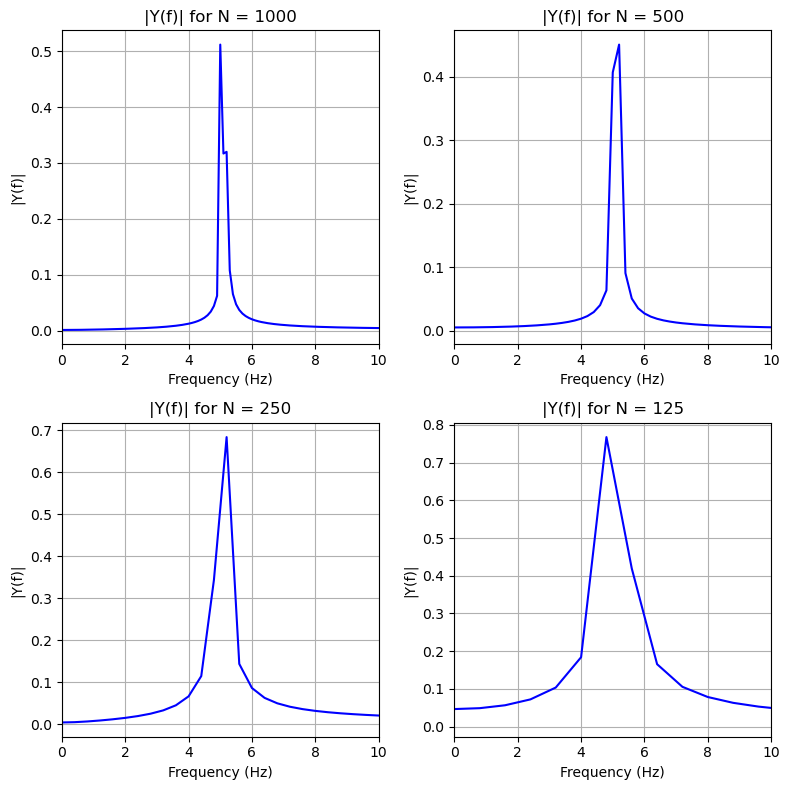

In [2]:
dt = 0.01 #s, sampling interval
A1 = 1 #Amplitude
f1 = 5 #Hz
f2 = 5.15 #Hz
A2 = 1
fig, axs = plt.subplots(2, 2, figsize=(8, 8))


N1 = 1000
t1 = np.arange(N1) * dt
y1 = A1 * np.cos(2 * np.pi * f1 * t1)
y2 = A2 * np.cos(2 * np.pi * f2 * t1)
y = y1 + y2
Y1 = np.fft.fft(y)
f_1 = np.fft.fftfreq(len(Y1), dt)
magY1 = np.abs(Y1) / N1
pos_mask = f_1 >= 0
f_1 = f_1[pos_mask]
magY1 = magY1[pos_mask]
## 
axs[0, 0].plot(f_1, magY1, 'b')
axs[0, 0].set_xlim(0,10)
axs[0, 0].set_title(f'|Y(f)| for N = {N1}')
axs[0, 0].set_xlabel('Frequency (Hz)')
axs[0, 0].set_ylabel('|Y(f)|')
axs[0, 0].grid(True)

N2 = 500
t2 = np.arange(N2) * dt
y1 = A1 * np.cos(2 * np.pi * f1 * t2)
y2 = A2 * np.cos(2 * np.pi * f2 * t2)
y = y1 + y2
Y2 = np.fft.fft(y)
f_2 = np.fft.fftfreq(len(Y2), dt)
magY2 = np.abs(Y2) / N2
pos_mask = f_2 >= 0
f_2 = f_2[pos_mask]
magY2 = magY2[pos_mask]
## 
axs[0, 1].plot(f_2, magY2, 'b')
axs[0, 1].set_xlim(0,10)
axs[0, 1].set_title(f'|Y(f)| for N = {N2}')
axs[0, 1].set_xlabel('Frequency (Hz)')
axs[0, 1].set_ylabel('|Y(f)|')
axs[0, 1].grid(True)


N3 = 250
t3 = np.arange(N3) * dt
y1 = A1 * np.cos(2 * np.pi * f1 * t3)
y2 = A2 * np.cos(2 * np.pi * f2 * t3)
y = y1 + y2
Y3 = np.fft.fft(y)
f_3 = np.fft.fftfreq(len(Y3), dt)
magY3 = np.abs(Y3) / N3
pos_mask = f_3 >= 0
f_3 = f_3[pos_mask]
magY3 = magY3[pos_mask]
## 
axs[1, 0].plot(f_3, magY3, 'b')
axs[1, 0].set_xlim(0,10)
axs[1, 0].set_title(f'|Y(f)| for N = {N3}')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('|Y(f)|')
axs[1, 0].grid(True)


N4 = 125
t4 = np.arange(N4) * dt
y1 = A1 * np.cos(2 * np.pi * f1 * t4)
y2 = A2 * np.cos(2 * np.pi * f2 * t4)
y = y1 + y2
Y4 = np.fft.fft(y)
f_4 = np.fft.fftfreq(len(Y4), dt)
magY4 = np.abs(Y4) / N4
pos_mask = f_4 >= 0
f_4 = f_4[pos_mask]
magY4 = magY4[pos_mask]
## 
axs[1, 1].plot(f_4, magY4, 'b')
axs[1, 1].set_xlim(0,10)
axs[1, 1].set_title(f'|Y(f)| for N = {N4}')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('|Y(f)|')
axs[1, 1].grid(True)

## Cosmetic
fig.tight_layout()

plt.savefig("AP 184 FT absval of Y(f).png")

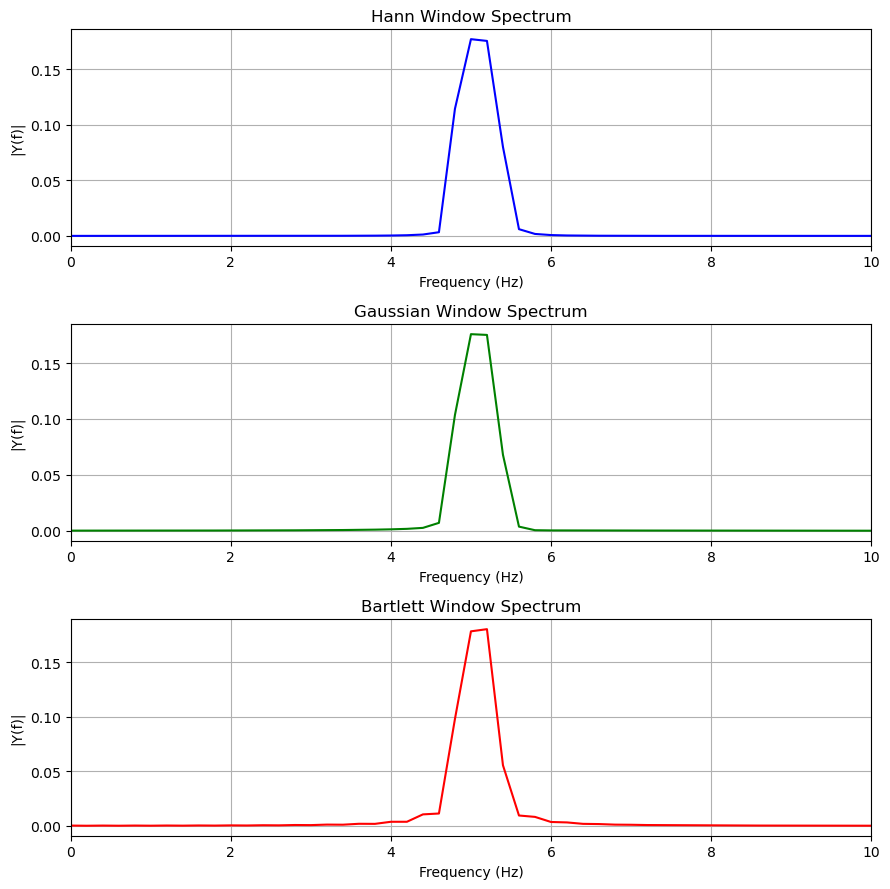

In [3]:
N = 500
t = np.arange(N) * dt
y1 = A1 * np.cos(2 * np.pi * f1 * t)
y2 = A2 * np.cos(2 * np.pi * f2 * t)
y = y1 + y2

f = np.fft.fftfreq(N, dt)
pos_mask = f >= 0
f = f[pos_mask]

# ---- (a) Hann Window ----
hann_win = windows.hann(N)
Y_hann = np.fft.fft(y * hann_win)
mag_hann = np.abs(Y_hann) / N
mag_hann = mag_hann[pos_mask]

# ---- (b) Gaussian Window ----
sigma = 0.4  # sigma <= 0.5
gauss_win = windows.gaussian(N, std=sigma * (N - 1) / 2)
Y_gauss = np.fft.fft(y * gauss_win)
mag_gauss = np.abs(Y_gauss) / N
mag_gauss = mag_gauss[pos_mask]

# ---- (c) Bartlett (Triangle) Window ----
bartlett_win = windows.bartlett(N)
Y_bartlett = np.fft.fft(y * bartlett_win)
mag_bartlett = np.abs(Y_bartlett) / N
mag_bartlett = mag_bartlett[pos_mask]


fig, axs = plt.subplots(3, 1, figsize=(9, 9))
## 
axs[0].plot(f, mag_hann, 'b')
axs[0].set_title("Hann Window Spectrum")
##
axs[1].plot(f, mag_gauss, 'g')
axs[1].set_title("Gaussian Window Spectrum")
##
axs[2].plot(f, mag_bartlett, 'r')
axs[2].set_title("Bartlett Window Spectrum")

## Cosmetic
for ax in axs:
    ax.set_xlim(0,10)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('|Y(f)|')
    ax.grid(True)
fig.tight_layout()

plt.savefig("AP 184 Windows.png")

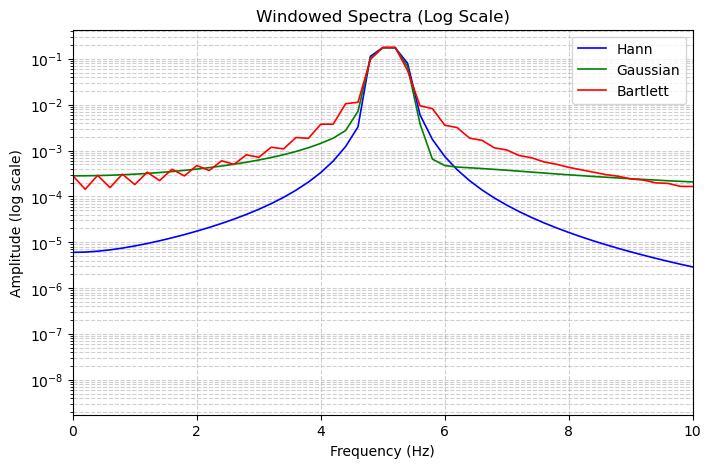

In [4]:
plt.figure(figsize=(8, 5))
plt.semilogy(f, mag_hann, 'b', label='Hann', linewidth=1.2)
plt.semilogy(f, mag_gauss, 'g', label='Gaussian', linewidth=1.2)
plt.semilogy(f, mag_bartlett, 'r', label='Bartlett', linewidth=1.2)
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (log scale)')
plt.title('Windowed Spectra (Log Scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.savefig("AP 184 Windowed Spectra.png")
plt.show()

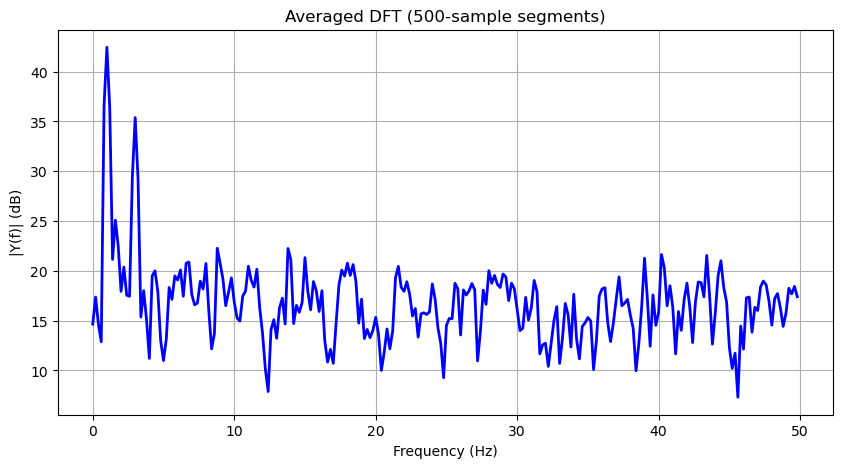

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Generate noisy signal
# -------------------------------
N = 1000              # total samples
dt = 0.01             # sampling interval (s)
t = np.arange(N) * dt

# Signal parameters
f1 = 1       # Hz
f2 = 3       # Hz
A1 = 1
A2 = 0.5

# Clean signals
y1 = A1 * np.cos(2 * np.pi * f1 * t)
y2 = A2 * np.cos(2 * np.pi * f2 * t)

# Add uniform random noise between -1 and +1
y = y1 + y2 + (2 * np.random.rand(N) - 1)

# -------------------------------
# Step 2: Segment the signal
# -------------------------------
M = 500                  # window size (samples)
segments = 5             # number of segments
step = 100               # step between segment starts (overlap optional)

y_segments = []
for k in range(segments):
    start = k * step
    end = start + M
    y_segments.append(y[start:end])
y_segments = np.array(y_segments)

# -------------------------------
# Step 3: Apply window and FFT
# -------------------------------
window = np.hanning(M)          # Hanning window
fs = 1 / dt                      # sampling frequency

Y_segments = []
for seg in y_segments:
    yw = seg * window            # apply window
    Y_seg = np.fft.fft(yw)
    Y_segments.append(Y_seg[:M//2])   # keep only positive frequencies
Y_segments = np.array(Y_segments)

# -------------------------------
# Step 4: Average the magnitude spectra
# -------------------------------
magY = np.abs(Y_segments)
avg_magY = magY.mean(axis=0)

# Frequency vector
f = np.fft.fftfreq(M, dt)[:M//2]

# -------------------------------
# Step 5: Plot averaged spectrum in log scale
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(f, 20 * np.log10(avg_magY), 'b', linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Y(f)| (dB)')
plt.title('Averaged DFT (500-sample segments)')
plt.grid(True)
plt.savefig("AP 184 Averaged DFT.png")
plt.show()


Resonant peak frequencies (Hz) and amplitudes:
Frequency: 329.60 Hz, Amplitude: 0.0996


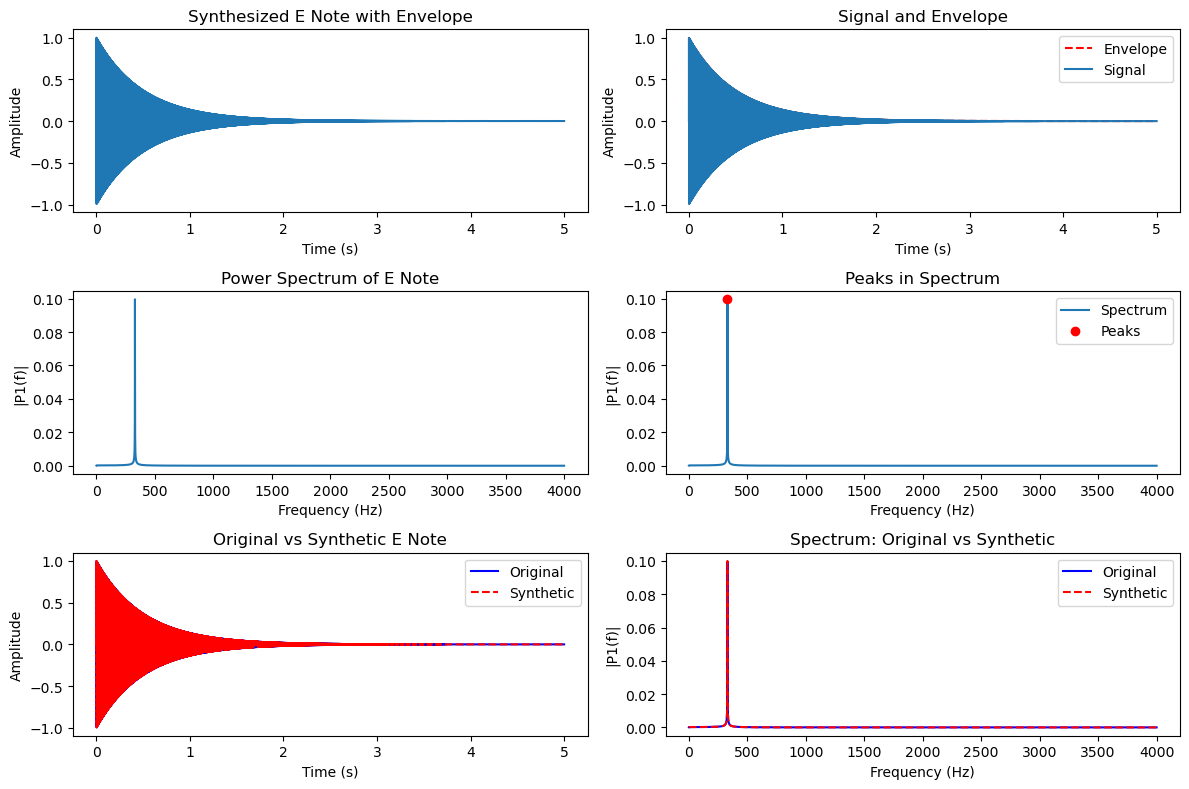

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# -------------------------------
# Step 1: Define the E note parameters
# -------------------------------
Fs = 8000         # Sampling frequency
duration = 5      # seconds
f_E = 329.63      # E4 note frequency in Hz
A = 1.0           # amplitude

t = np.arange(0, duration, 1/Fs)

# -------------------------------
# Step 2: Synthesize the E note
# -------------------------------
y = A * np.sin(2 * np.pi * f_E * t)

# Apply exponential decay envelope
envelope = np.exp(-2 * t)  # decay rate can be adjusted
y_enveloped = y * envelope

# -------------------------------
# Step 3: Plot time-domain signal
# -------------------------------
plt.figure(figsize=(12, 8))

plt.subplot(3,2,1)
plt.plot(t, y_enveloped)
plt.title("Synthesized E Note with Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3,2,2)
plt.plot(t, envelope, 'r--', label='Envelope')
plt.plot(t, y_enveloped, label='Signal')
plt.title("Signal and Envelope")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# -------------------------------
# Step 4: Compute FFT
# -------------------------------
N = len(y_enveloped)
Y = np.fft.fft(y_enveloped)
P2 = np.abs(Y / N)
P1 = P2[:N//2+1]
P1[1:-1] = 2 * P1[1:-1]
f = Fs * np.arange(0, N//2+1) / N

plt.subplot(3,2,3)
plt.plot(f, P1)
plt.title("Power Spectrum of E Note")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|P1(f)|")

# -------------------------------
# Step 5: Find resonant peak
# -------------------------------
peaks, _ = find_peaks(P1, height=0.05)  # ignore very small peaks
peak_vals = P1[peaks]
peak_freqs = f[peaks]

print("Resonant peak frequencies (Hz) and amplitudes:")
for freq, amp in zip(peak_freqs, peak_vals):
    print(f"Frequency: {freq:.2f} Hz, Amplitude: {amp:.4f}")

# Highlight peaks on spectrum
plt.subplot(3,2,4)
plt.plot(f, P1, label='Spectrum')
plt.plot(peak_freqs, peak_vals, 'ro', label='Peaks')
plt.title("Peaks in Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|P1(f)|")
plt.legend()

# -------------------------------
# Step 6: Re-synthesize using detected peaks
# -------------------------------
synthetic_signal = np.zeros_like(t)
for freq, amp in zip(peak_freqs, peak_vals):
    if 0 < freq < Fs/2:
        synthetic_signal += amp * np.sin(2 * np.pi * freq * t)

# Apply the same envelope
synthetic_signal *= envelope / np.max(np.abs(synthetic_signal))

plt.subplot(3,2,5)
plt.plot(t, y_enveloped, 'b', label='Original')
plt.plot(t, synthetic_signal, 'r--', label='Synthetic')
plt.title("Original vs Synthetic E Note")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()

# -------------------------------
# Step 7: Compare spectra
# -------------------------------
Y_synth = np.fft.fft(synthetic_signal)
P2_synth = np.abs(Y_synth / N)
P1_synth = P2_synth[:N//2+1]
P1_synth[1:-1] = 2 * P1_synth[1:-1]

plt.subplot(3,2,6)
plt.plot(f, P1, 'b', label='Original')
plt.plot(f, P1_synth, 'r--', label='Synthetic')
plt.title("Spectrum: Original vs Synthetic")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|P1(f)|")
plt.legend()

plt.tight_layout()
plt.savefig("AP184 E note.png")
plt.show()


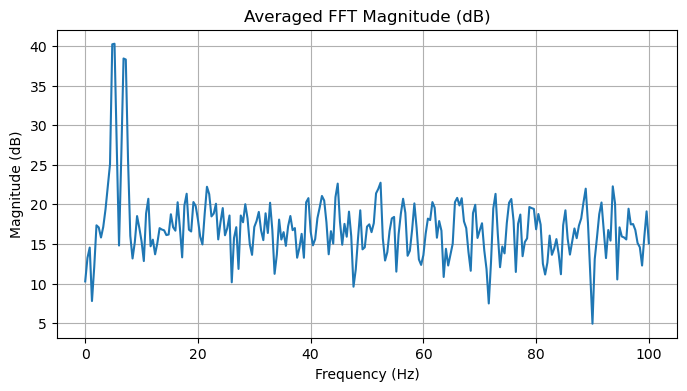

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Generate 1000-sample signal with noise
# -------------------------------
N = 1000
Fs = 200  # arbitrary sampling frequency for time axis
t = np.arange(N) / Fs

# Two sinusoids
f1, f2 = 5, 7  # Hz
A1, A2 = 1.0, 0.8
y1 = A1 * np.cos(2 * np.pi * f1 * t)
y2 = A2 * np.cos(2 * np.pi * f2 * t)

# Add random noise
y = y1 + y2 + (2*np.random.rand(N) - 1)

# -------------------------------
# Step 2: Take several sequences of 500 samples
# -------------------------------
segment_length = 500
num_segments = 3  # can choose overlapping or non-overlapping segments
start_indices = [0, 250, 500]  # example positions

# Choose a window
window = np.hanning(segment_length)  # Hanning window

# Store DFTs
DFTs = []

for start in start_indices:
    segment = y[start:start+segment_length]
    segment = segment * window
    Y = np.fft.fft(segment)
    DFTs.append(Y[:segment_length//2+1])  # keep positive frequencies

# -------------------------------
# Step 3: Average the DFT magnitudes
# -------------------------------
DFTs = np.array(DFTs)
avg_mag = np.mean(np.abs(DFTs), axis=0)
f = Fs * np.arange(0, segment_length//2+1) / segment_length

# Plot in log scale
plt.figure(figsize=(8,4))
plt.plot(f, 20*np.log10(avg_mag))  # log amplitude
plt.title("Averaged FFT Magnitude (dB)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.show()

